In [2]:
import numpy as np 
import pandas as pd 
import lasio
las = lasio.read('/Users/bashayeralemadi/Desktop/PETE-219(Seers)/Group 4/1051661435.las')

In [3]:
import os 
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import missingno as msno
import matplotlib.pyplot as plt
import pylab 
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

In [4]:
pip install lasio

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


# 1. Data import and cleaning

In [6]:
import lasio
las = lasio.read('/Users/bashayeralemadi/Desktop/PETE-219(Seers)/Group 4/1051661435.las')

In [7]:
df = las.df()
 

# convert to a data frame
df['DEPT'] = df.index
df


,AVTX,BVTX,CILD,CNDL,CNLS,CNPOR,CNSS,GR,LSPD,LTEN,...,MI,MN,ITT,DT,SPOR,DCAL,RHOB,RHOC,DPOR,DEPT
DEPT,,,,,,,,,,,,,,,,,,,,,
195.0,0.0,0.0,0.0,26.4700,33.6237,33.6237,36.2265,74.6573,-91.50,605.4985,...,0.8857,0.1488,0.0,271.2051,158.1366,3.2576,2.1956,0.0015,30.0829,195.0
195.5,0.0,0.0,0.0,22.3399,30.5414,30.5414,33.0535,75.4569,-91.50,604.8134,...,0.8884,0.1548,0.0,268.7420,156.3946,3.2574,2.1990,0.0040,29.8808,195.5
196.0,0.0,0.0,0.0,21.4375,29.9558,29.9558,32.4553,75.7853,-91.50,604.4182,...,0.8905,0.1598,0.0,266.9755,155.1454,3.2572,2.2002,0.0030,29.8121,196.0
196.5,0.0,0.0,0.0,24.5568,32.2824,32.2824,34.8682,72.0167,-91.62,603.3654,...,0.8907,0.1628,0.0,267.1826,155.2918,3.2573,2.2002,0.0014,29.8108,196.5
197.0,0.0,0.0,0.0,27.8221,34.8708,34.8708,37.3877,66.1658,-91.62,602.8718,...,0.8886,0.1649,0.0,269.0547,156.6158,3.2574,2.1990,0.0003,29.8815,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4573.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,-27.54,1251.5197,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4573.0
4573.5,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,-27.54,1245.0347,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4573.5
4574.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,-27.67,1234.3610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4574.0


CNPOR neutron porosity

RHOB bulk density

RILD deep resistivity

RILM medium resistivity

RLL3 shallow resistivity

GR Gamma Ray

Deleting some columns since they are of no use

In [8]:
df.drop(columns=['MI','MN' ,'CNSS' ,'CNLS','CNDL' ,'AVTX' ,'BVTX','LSPD' ,'LTEN' ,'DT' ,'RHOC'],axis=1,inplace=True)

### We dont need some of the columns so just directly remove them

CNPOR neutron porosity

RHOB bulk density

RILD deep resistivity

RILM medium resistivity

RLL3 shallow resistivity

GR Gamma Ray

<Axes: ylabel='DEPT'>

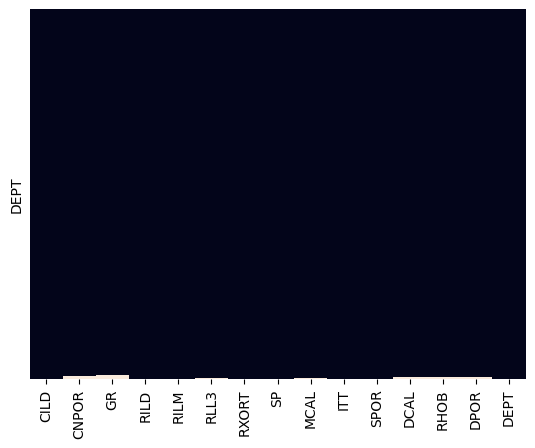

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [10]:
df.dropna(inplace=True)

<Axes: >

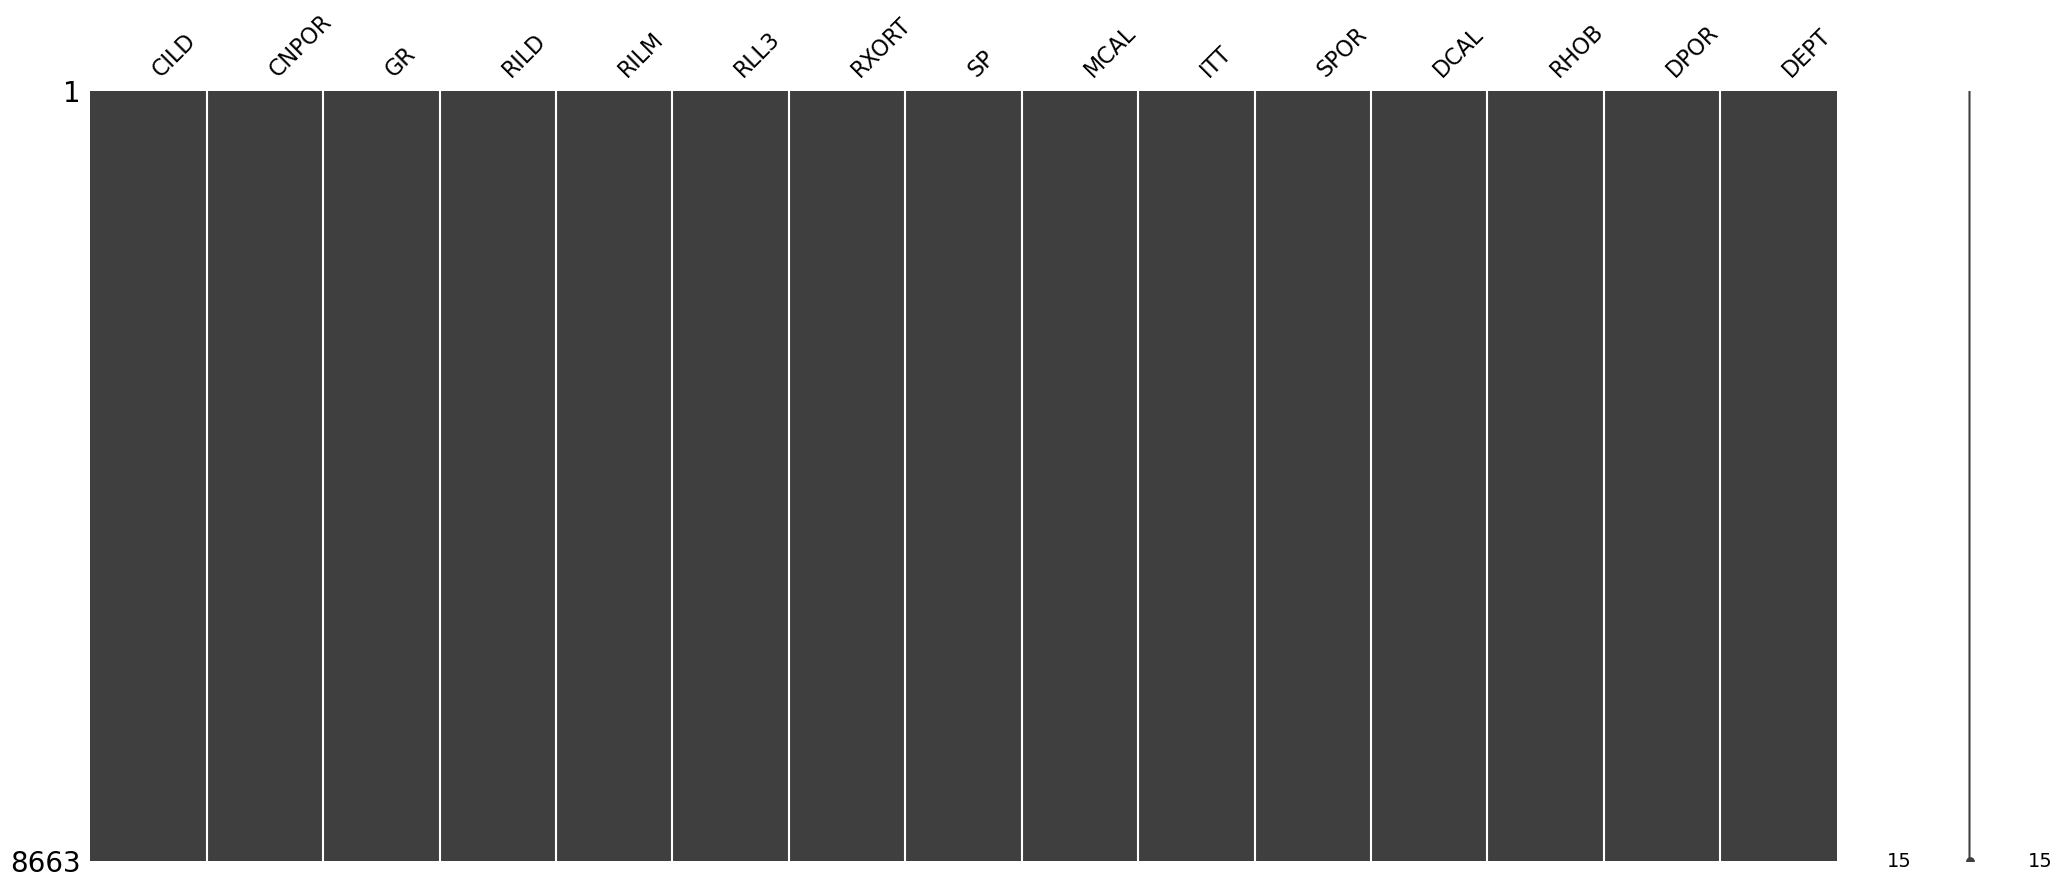

In [11]:
import missingno as msno
msno.matrix(df)

<Axes: xlabel='DEPT'>

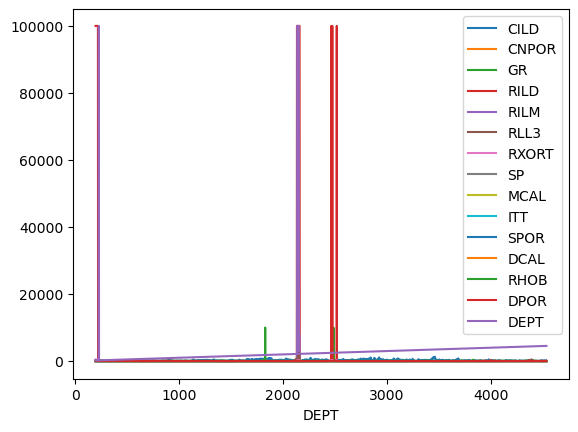

In [12]:
df.plot()

In [13]:
df.isnull().sum()

CILD     0
CNPOR    0
GR       0
RILD     0
RILM     0
RLL3     0
RXORT    0
SP       0
MCAL     0
ITT      0
SPOR     0
DCAL     0
RHOB     0
DPOR     0
DEPT     0
dtype: int64

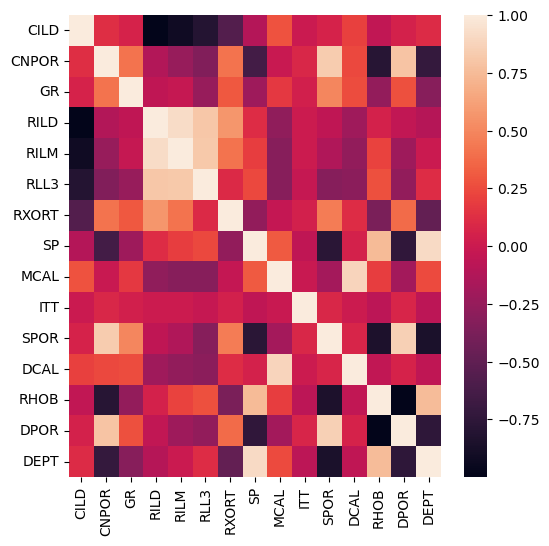

In [14]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(method='spearman'))
plt.show()

1. min values of each column

In [15]:
for col in df.columns:
    minn=min(df[col])
    print(f"Min value in column {col} is ", minn)

Min value in column CILD is  0.0
Min value in column CNPOR is  -34.6393
Min value in column GR is  -100.3876
Min value in column RILD is  0.4689
Min value in column RILM is  0.8518
Min value in column RLL3 is  0.4939
Min value in column RXORT is  -141.2022
Min value in column SP is  -246.3245
Min value in column MCAL is  -8.1987
Min value in column ITT is  0.0
Min value in column SPOR is  -0.4709
Min value in column DCAL is  3.2536
Min value in column RHOB is  -2.4718
Min value in column DPOR is  -15.0963
Min value in column DEPT is  195.0


In [16]:
# 2. max values of each column

for col in df.columns:
    maxx=max(df[col])
    print(f"Max value in column {col} is ", maxx)

Max value in column CILD is  2132.7646
Max value in column CNPOR is  66.1159
Max value in column GR is  10000.0
Max value in column RILD is  100000.0
Max value in column RILM is  100000.0
Max value in column RLL3 is  2422.9404
Max value in column RXORT is  477.5094
Max value in column SP is  -30.9765
Max value in column MCAL is  16.114
Max value in column ITT is  2.0
Max value in column SPOR is  164.2851
Max value in column DCAL is  11.8673
Max value in column RHOB is  20.2849
Max value in column DPOR is  86.8386
Max value in column DEPT is  4533.0


In [17]:
# 3. avg values of each column

for col in df.columns:
    avg=0
    for val in df[col]:
        avg+=val
    avg/=len(df[col])
    print(f"Mean value in column {col} is ", avg)

Mean value in column CILD is  238.39055016737865
Mean value in column CNPOR is  23.071778413944354
Mean value in column GR is  81.03238861826199
Mean value in column RILD is  1258.589085743974
Mean value in column RILM is  427.54290020777944
Mean value in column RLL3 is  20.543666189541742
Mean value in column RXORT is  -9.113089610989277
Mean value in column SP is  -157.72816770172
Mean value in column MCAL is  8.35743368348148
Mean value in column ITT is  0.07676324598868753
Mean value in column SPOR is  31.5611517026434
Mean value in column DCAL is  8.584373715802824
Mean value in column RHOB is  2.3550807226134087
Mean value in column DPOR is  20.90478961098927
Mean value in column DEPT is  2364.3524183308323


In [18]:
# 4 Mode 

mode=0
for col in df.columns:
    mode=df[col].mode()[0]
    print(f"Mode for the column {col} is: ",mode)

Mode for the column CILD is:  0.0
Mode for the column CNPOR is:  24.5909
Mode for the column GR is:  31.3332
Mode for the column RILD is:  100000.0
Mode for the column RILM is:  100000.0
Mode for the column RLL3 is:  0.4959
Mode for the column RXORT is:  -45.2032
Mode for the column SP is:  -237.8707
Mode for the column MCAL is:  7.7561
Mode for the column ITT is:  0.0
Mode for the column SPOR is:  0.0904
Mode for the column DCAL is:  11.8359
Mode for the column RHOB is:  2.4081
Mode for the column DPOR is:  4.6398
Mode for the column DEPT is:  195.0


In [19]:
# 5 Median'

median=0
for col in df.columns:
    median=df[col].median()
    print(f"Median for the column {col} is: ",median)


Median for the column CILD is:  197.6348
Median for the column CNPOR is:  24.0887
Median for the column GR is:  79.2675
Median for the column RILD is:  5.0598
Median for the column RILM is:  4.5182
Median for the column RLL3 is:  6.7961
Median for the column RXORT is:  -11.66
Median for the column SP is:  -164.8015
Median for the column MCAL is:  7.9987
Median for the column ITT is:  0.0
Median for the column SPOR is:  28.2965
Median for the column DCAL is:  8.1122
Median for the column RHOB is:  2.4064
Median for the column DPOR is:  17.7547
Median for the column DEPT is:  2365.5


In [20]:
# 6 Standard DeviatioN


std=0
for col in df.columns:
    std=df[col].std()
    print(f"Standard Deviation for the column {col} is: ",std)

Standard Deviation for the column CILD is:  197.17891853880425
Standard Deviation for the column CNPOR is:  10.418375534912181
Standard Deviation for the column GR is:  154.1507632883738
Standard Deviation for the column RILD is:  11095.038112046805
Standard Deviation for the column RILM is:  6433.655095684315
Standard Deviation for the column RLL3 is:  98.65554238836803
Standard Deviation for the column RXORT is:  47.42202608670613
Standard Deviation for the column SP is:  62.64741893650768
Standard Deviation for the column MCAL is:  1.1060685539916615
Standard Deviation for the column ITT is:  0.2902940891755853
Standard Deviation for the column SPOR is:  20.61139281809565
Standard Deviation for the column DCAL is:  1.128647923033665
Standard Deviation for the column RHOB is:  0.3813483089644176
Standard Deviation for the column DPOR is:  14.852372959556742
Standard Deviation for the column DEPT is:  1252.2522368947846


In [21]:
# 7 Variance

var=0
for col in df.columns:
    std=df[col].std()
    var=std**2
    print(f"Variance for the column {col} is: ",var)

Variance for the column CILD is:  38879.52591613241
Variance for the column CNPOR is:  108.54254878645668
Variance for the column GR is:  23762.457822388256
Variance for the column RILD is:  123099870.70777112
Variance for the column RILM is:  41391917.89022475
Variance for the column RLL3 is:  9732.916043943082
Variance for the column RXORT is:  2248.848558168237
Variance for the column SP is:  3924.699099406301
Variance for the column MCAL is:  1.223387646129205
Variance for the column ITT is:  0.08427065821028266
Variance for the column SPOR is:  424.8295139018449
Variance for the column DCAL is:  1.273846134168206
Variance for the column RHOB is:  0.14542653275002093
Variance for the column DPOR is:  220.5929825297723
Variance for the column DEPT is:  1568135.6648079916


In [22]:
df=df[df['RILD']>=0]
df=df[df['CNPOR']>=0]
df=df[df['RLL3']>=0]
df=df[df['RHOB']>=0]
df=df[df['GR']>=0]
df


,CILD,CNPOR,GR,RILD,RILM,RLL3,RXORT,SP,MCAL,ITT,SPOR,DCAL,RHOB,DPOR,DEPT
DEPT,,,,,,,,,,,,,,,
195.0,0.0000,33.6237,74.6573,100000.0000,102.4693,0.4966,477.3602,-199.2600,5.3710,0.0,158.1366,3.2576,2.1956,30.0829,195.0
195.5,0.0000,30.5414,75.4569,100000.0000,104.1353,0.4962,477.3797,-198.3053,5.3718,0.0,156.3946,3.2574,2.1990,29.8808,195.5
196.0,0.0000,29.9558,75.7853,100000.0000,101.5104,0.4959,477.3945,-197.1277,5.3776,0.0,155.1454,3.2572,2.2002,29.8121,196.0
196.5,0.0000,32.2824,72.0167,100000.0000,95.1067,0.4960,477.4019,-195.9910,5.3775,0.0,155.2918,3.2573,2.2002,29.8108,196.5
197.0,0.0000,34.8708,66.1658,100000.0000,86.3613,0.4961,477.4013,-195.3299,5.3726,0.0,156.6158,3.2574,2.1990,29.8815,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4531.0,34.9168,5.7661,27.0650,28.6395,42.6085,98.4967,-46.0816,-58.0977,7.7581,0.0,4.7544,7.1496,2.5607,8.7294,4531.0
4531.5,28.3953,5.7760,26.9819,35.2171,53.6845,112.7332,-43.3178,-56.0571,7.7440,0.0,4.6080,7.1504,2.5787,7.6763,4531.5
4532.0,23.1745,5.6534,26.6880,43.1509,66.0023,120.8478,-38.9684,-54.0713,7.7310,0.0,4.5308,7.1504,2.6024,6.2927,4532.0


# 2. Data Visualization

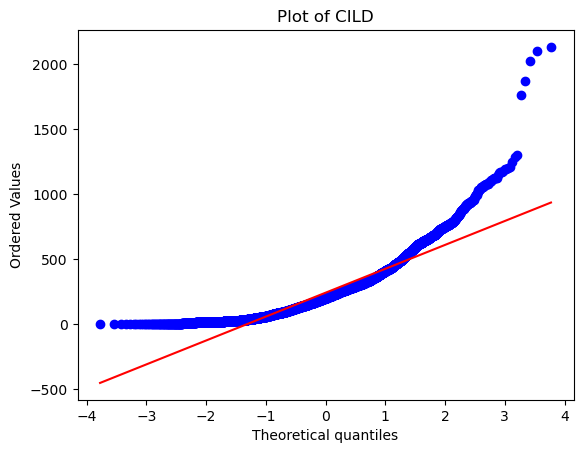

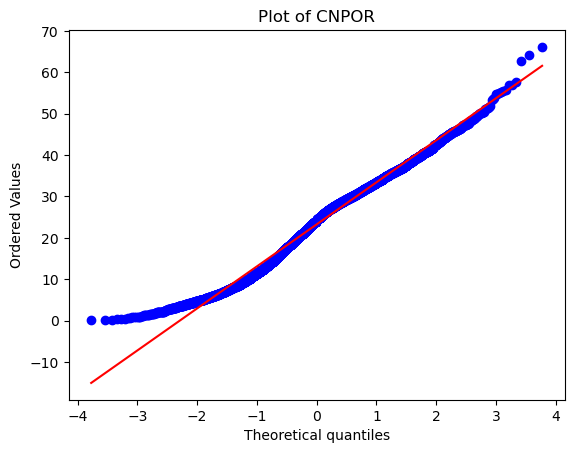

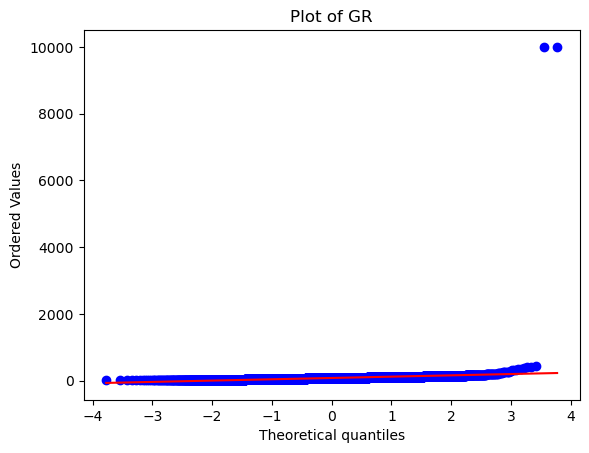

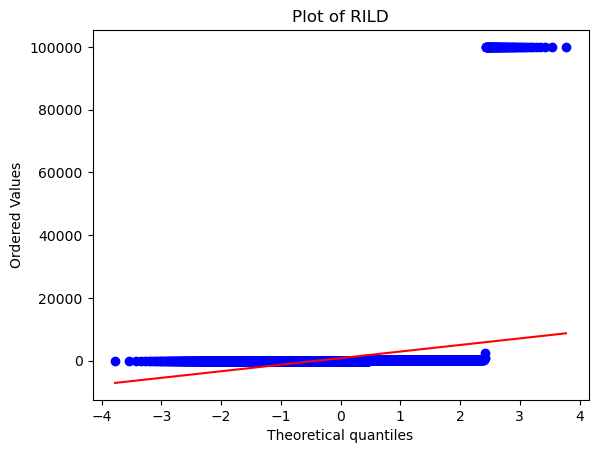

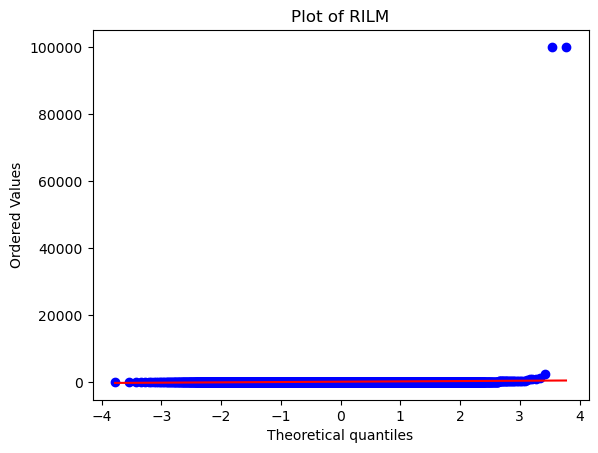

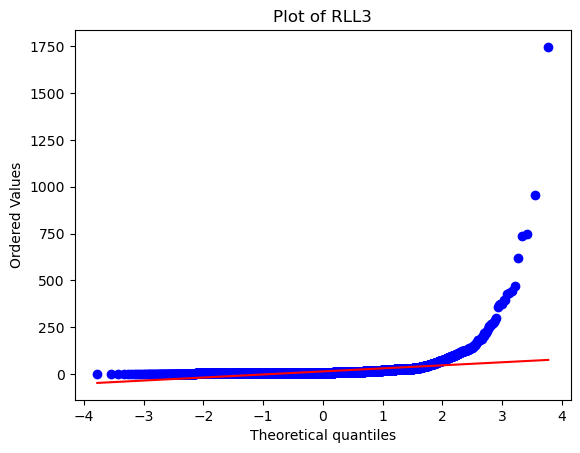

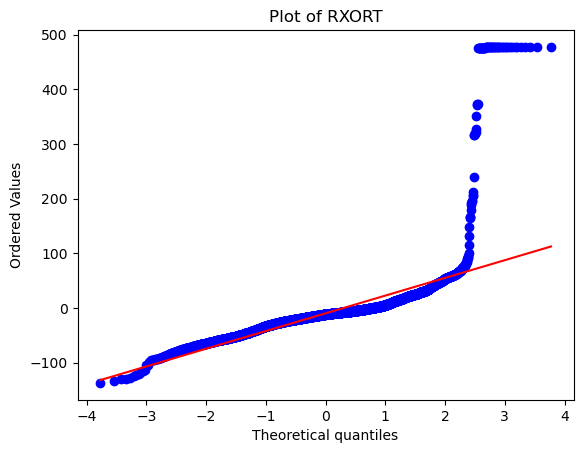

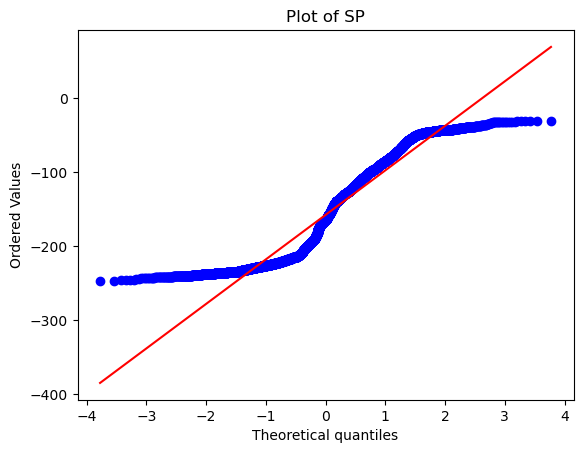

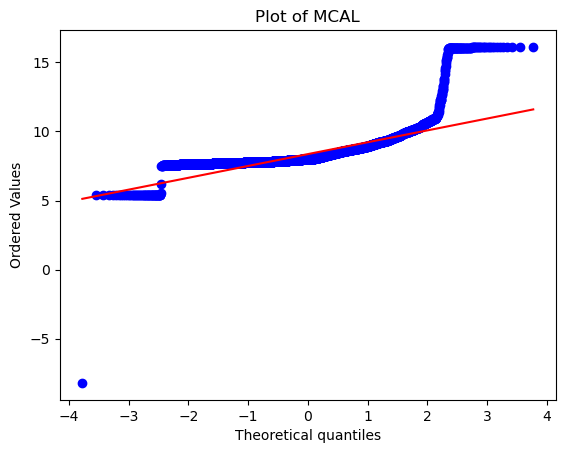

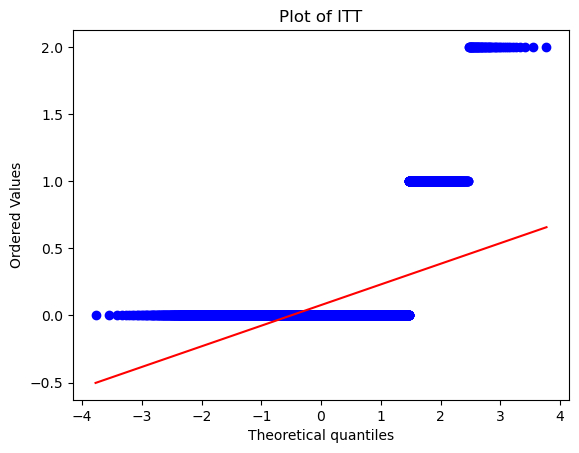

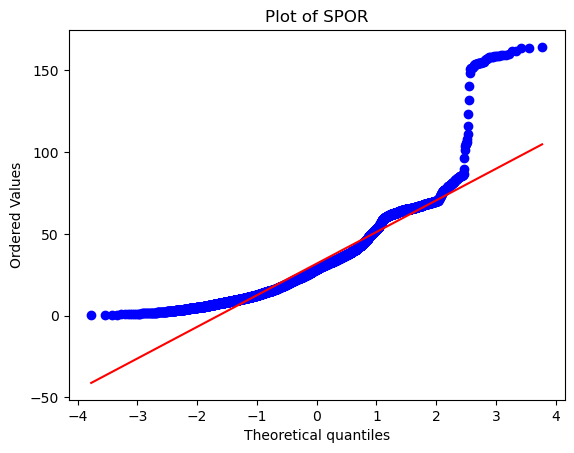

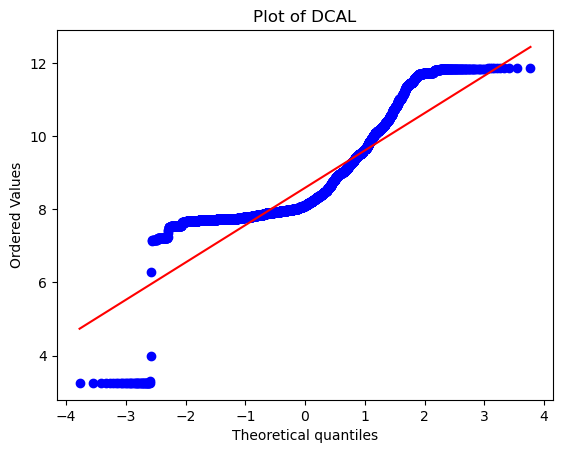

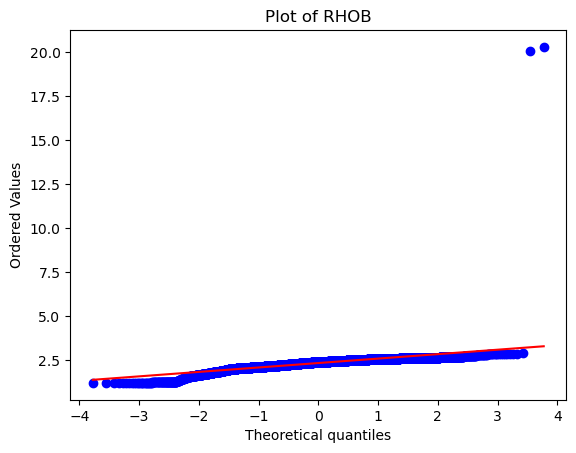

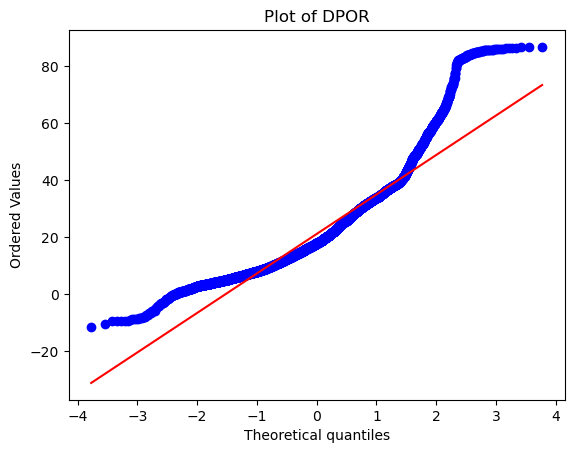

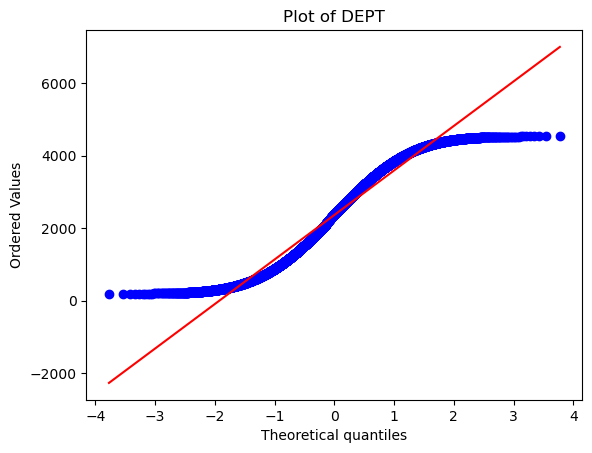

In [23]:

for col in df.columns:
    stats.probplot(df[col], dist="norm", plot=pylab)
   
    plt.title(f'Plot of {col}')
    pylab.show()

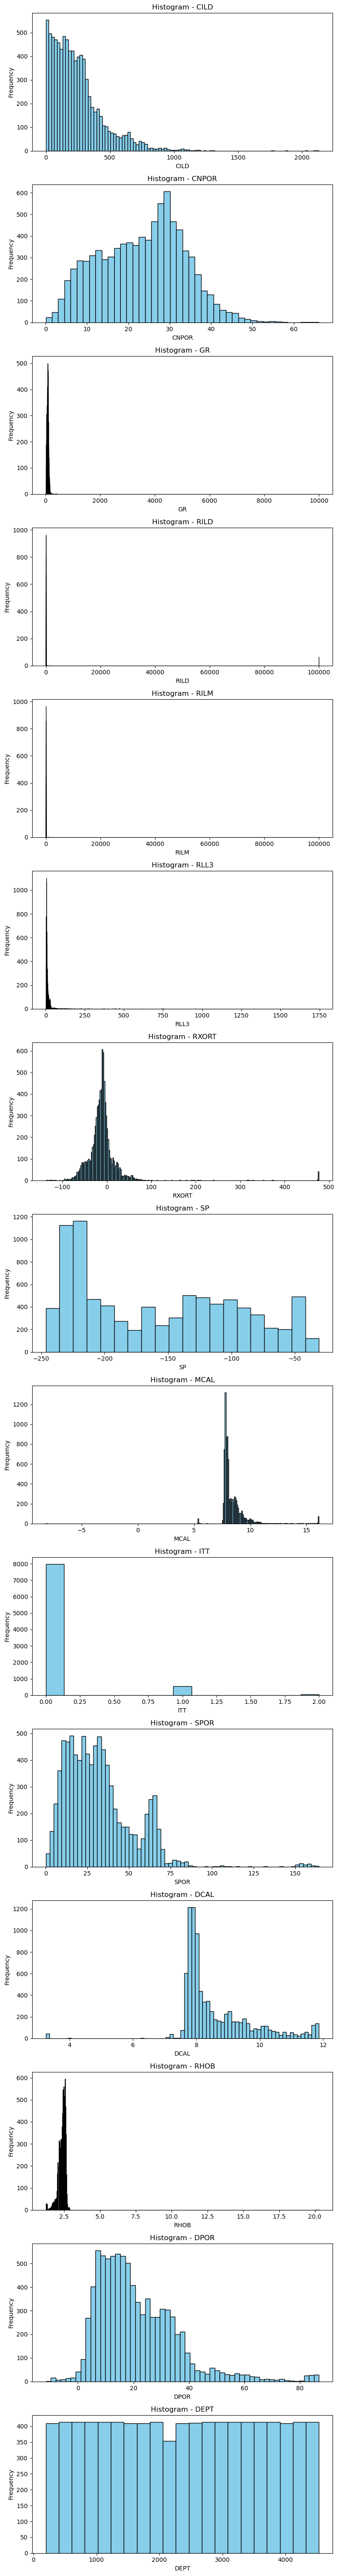

In [29]:
fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(8, 4 * len(df.columns)))

for i, col in enumerate(df.columns):
    axes[i].hist(df[col], bins='auto', color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram - {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [30]:
## For visualization
new_df=df
# convert to a data frame
new_df['DEPT'] = new_df.index

In [31]:
DF = new_df.copy()


In [32]:
DF

,CILD,CNPOR,GR,RILD,RILM,RLL3,RXORT,SP,MCAL,ITT,SPOR,DCAL,RHOB,DPOR,DEPT
DEPT,,,,,,,,,,,,,,,
195.0,0.0000,33.6237,74.6573,100000.0000,102.4693,0.4966,477.3602,-199.2600,5.3710,0.0,158.1366,3.2576,2.1956,30.0829,195.0
195.5,0.0000,30.5414,75.4569,100000.0000,104.1353,0.4962,477.3797,-198.3053,5.3718,0.0,156.3946,3.2574,2.1990,29.8808,195.5
196.0,0.0000,29.9558,75.7853,100000.0000,101.5104,0.4959,477.3945,-197.1277,5.3776,0.0,155.1454,3.2572,2.2002,29.8121,196.0
196.5,0.0000,32.2824,72.0167,100000.0000,95.1067,0.4960,477.4019,-195.9910,5.3775,0.0,155.2918,3.2573,2.2002,29.8108,196.5
197.0,0.0000,34.8708,66.1658,100000.0000,86.3613,0.4961,477.4013,-195.3299,5.3726,0.0,156.6158,3.2574,2.1990,29.8815,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4531.0,34.9168,5.7661,27.0650,28.6395,42.6085,98.4967,-46.0816,-58.0977,7.7581,0.0,4.7544,7.1496,2.5607,8.7294,4531.0
4531.5,28.3953,5.7760,26.9819,35.2171,53.6845,112.7332,-43.3178,-56.0571,7.7440,0.0,4.6080,7.1504,2.5787,7.6763,4531.5
4532.0,23.1745,5.6534,26.6880,43.1509,66.0023,120.8478,-38.9684,-54.0713,7.7310,0.0,4.5308,7.1504,2.6024,6.2927,4532.0


In [33]:
import numpy as np
DF = new_df.copy()
#DF.drop(DF[DF['GR'] >= 160].index, inplace = True)
#DF.drop(DF[DF['GR'] <= 0].index, inplace = True)

logi=DF["GR"]<=0

np.sum(logi)

DF.loc[logi,"GR"]=np.nan

logi=DF["GR"]>= 160

np.sum(logi)

DF.loc[logi,"GR"]=np.nan

In [34]:
DF

,CILD,CNPOR,GR,RILD,RILM,RLL3,RXORT,SP,MCAL,ITT,SPOR,DCAL,RHOB,DPOR,DEPT
DEPT,,,,,,,,,,,,,,,
195.0,0.0000,33.6237,74.6573,100000.0000,102.4693,0.4966,477.3602,-199.2600,5.3710,0.0,158.1366,3.2576,2.1956,30.0829,195.0
195.5,0.0000,30.5414,75.4569,100000.0000,104.1353,0.4962,477.3797,-198.3053,5.3718,0.0,156.3946,3.2574,2.1990,29.8808,195.5
196.0,0.0000,29.9558,75.7853,100000.0000,101.5104,0.4959,477.3945,-197.1277,5.3776,0.0,155.1454,3.2572,2.2002,29.8121,196.0
196.5,0.0000,32.2824,72.0167,100000.0000,95.1067,0.4960,477.4019,-195.9910,5.3775,0.0,155.2918,3.2573,2.2002,29.8108,196.5
197.0,0.0000,34.8708,66.1658,100000.0000,86.3613,0.4961,477.4013,-195.3299,5.3726,0.0,156.6158,3.2574,2.1990,29.8815,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4531.0,34.9168,5.7661,27.0650,28.6395,42.6085,98.4967,-46.0816,-58.0977,7.7581,0.0,4.7544,7.1496,2.5607,8.7294,4531.0
4531.5,28.3953,5.7760,26.9819,35.2171,53.6845,112.7332,-43.3178,-56.0571,7.7440,0.0,4.6080,7.1504,2.5787,7.6763,4531.5
4532.0,23.1745,5.6534,26.6880,43.1509,66.0023,120.8478,-38.9684,-54.0713,7.7310,0.0,4.5308,7.1504,2.6024,6.2927,4532.0


In [35]:
DF.isnull().sum()

CILD      0
CNPOR     0
GR       86
RILD      0
RILM      0
RLL3      0
RXORT     0
SP        0
MCAL      0
ITT       0
SPOR      0
DCAL      0
RHOB      0
DPOR      0
DEPT      0
dtype: int64

In [36]:
DF.dropna(inplace=True)

In [37]:
DF


,CILD,CNPOR,GR,RILD,RILM,RLL3,RXORT,SP,MCAL,ITT,SPOR,DCAL,RHOB,DPOR,DEPT
DEPT,,,,,,,,,,,,,,,
195.0,0.0000,33.6237,74.6573,100000.0000,102.4693,0.4966,477.3602,-199.2600,5.3710,0.0,158.1366,3.2576,2.1956,30.0829,195.0
195.5,0.0000,30.5414,75.4569,100000.0000,104.1353,0.4962,477.3797,-198.3053,5.3718,0.0,156.3946,3.2574,2.1990,29.8808,195.5
196.0,0.0000,29.9558,75.7853,100000.0000,101.5104,0.4959,477.3945,-197.1277,5.3776,0.0,155.1454,3.2572,2.2002,29.8121,196.0
196.5,0.0000,32.2824,72.0167,100000.0000,95.1067,0.4960,477.4019,-195.9910,5.3775,0.0,155.2918,3.2573,2.2002,29.8108,196.5
197.0,0.0000,34.8708,66.1658,100000.0000,86.3613,0.4961,477.4013,-195.3299,5.3726,0.0,156.6158,3.2574,2.1990,29.8815,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4531.0,34.9168,5.7661,27.0650,28.6395,42.6085,98.4967,-46.0816,-58.0977,7.7581,0.0,4.7544,7.1496,2.5607,8.7294,4531.0
4531.5,28.3953,5.7760,26.9819,35.2171,53.6845,112.7332,-43.3178,-56.0571,7.7440,0.0,4.6080,7.1504,2.5787,7.6763,4531.5
4532.0,23.1745,5.6534,26.6880,43.1509,66.0023,120.8478,-38.9684,-54.0713,7.7310,0.0,4.5308,7.1504,2.6024,6.2927,4532.0


<Axes: >

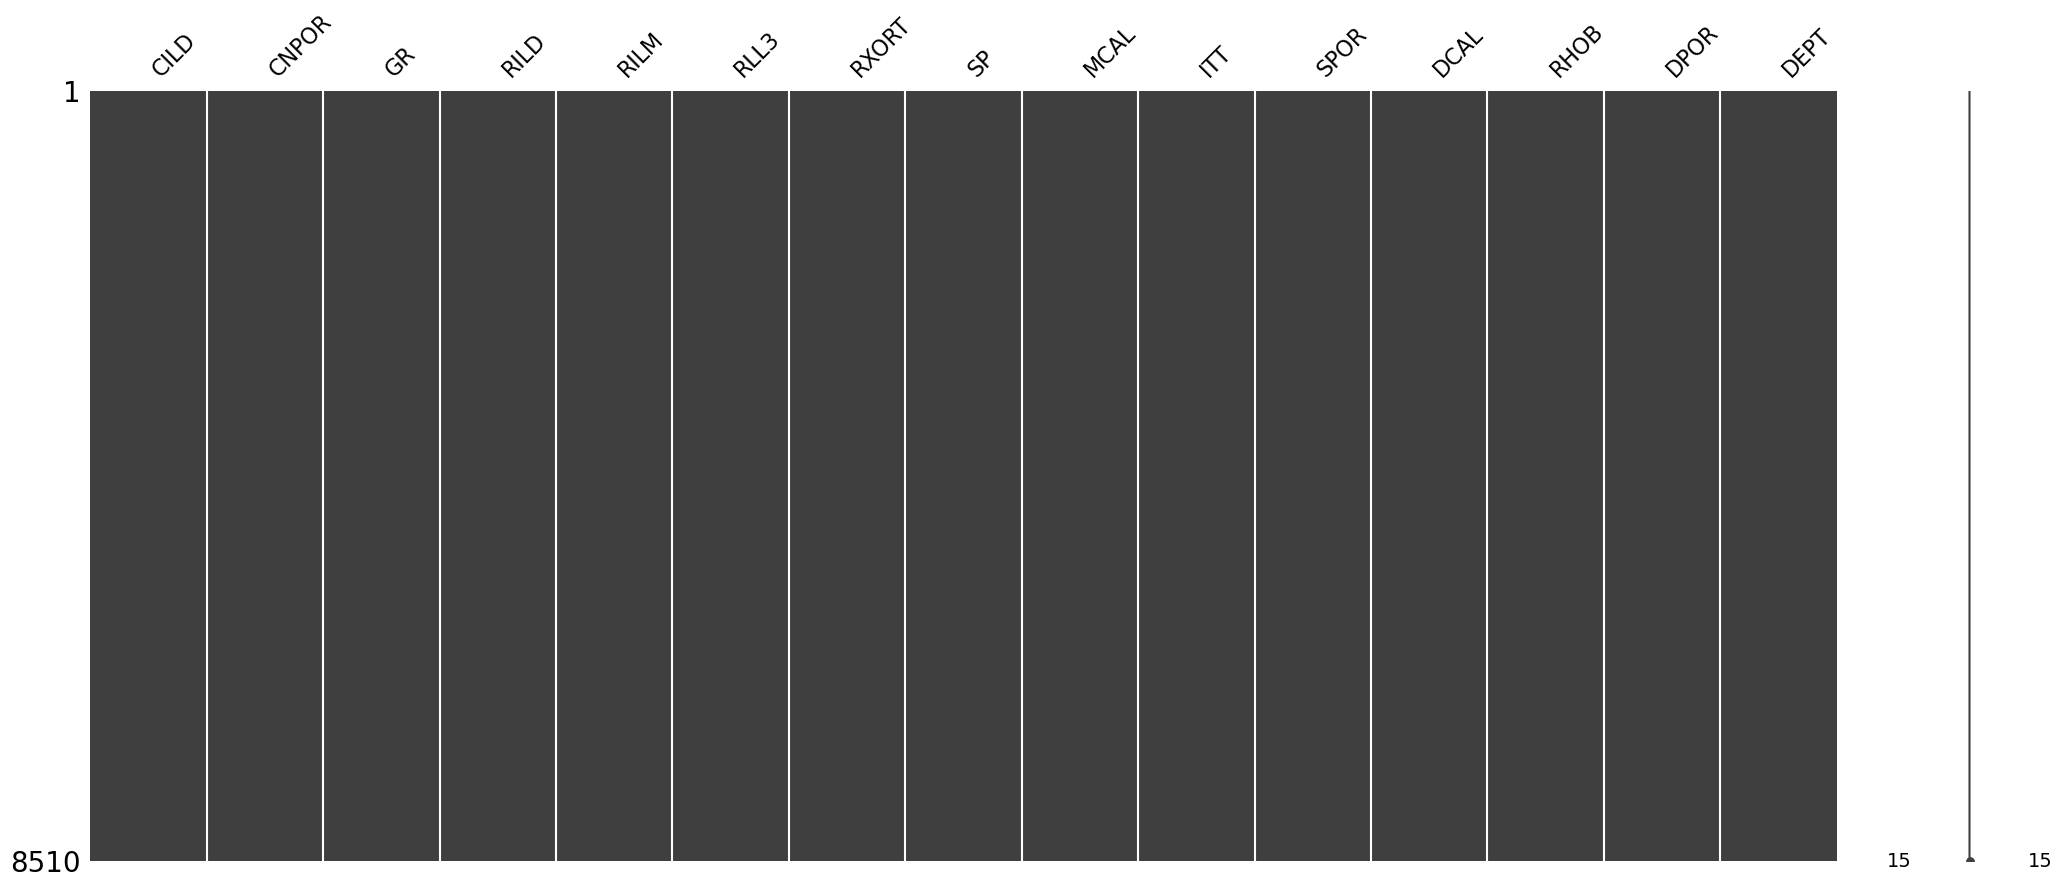

In [38]:
msno.matrix(DF)

In [39]:
DF=DF[(DF['RILD']<=400 ) | DF['RILD']>=0]
DF=DF[(DF['RHOB']<=5 ) | DF['RHOB']>=0]


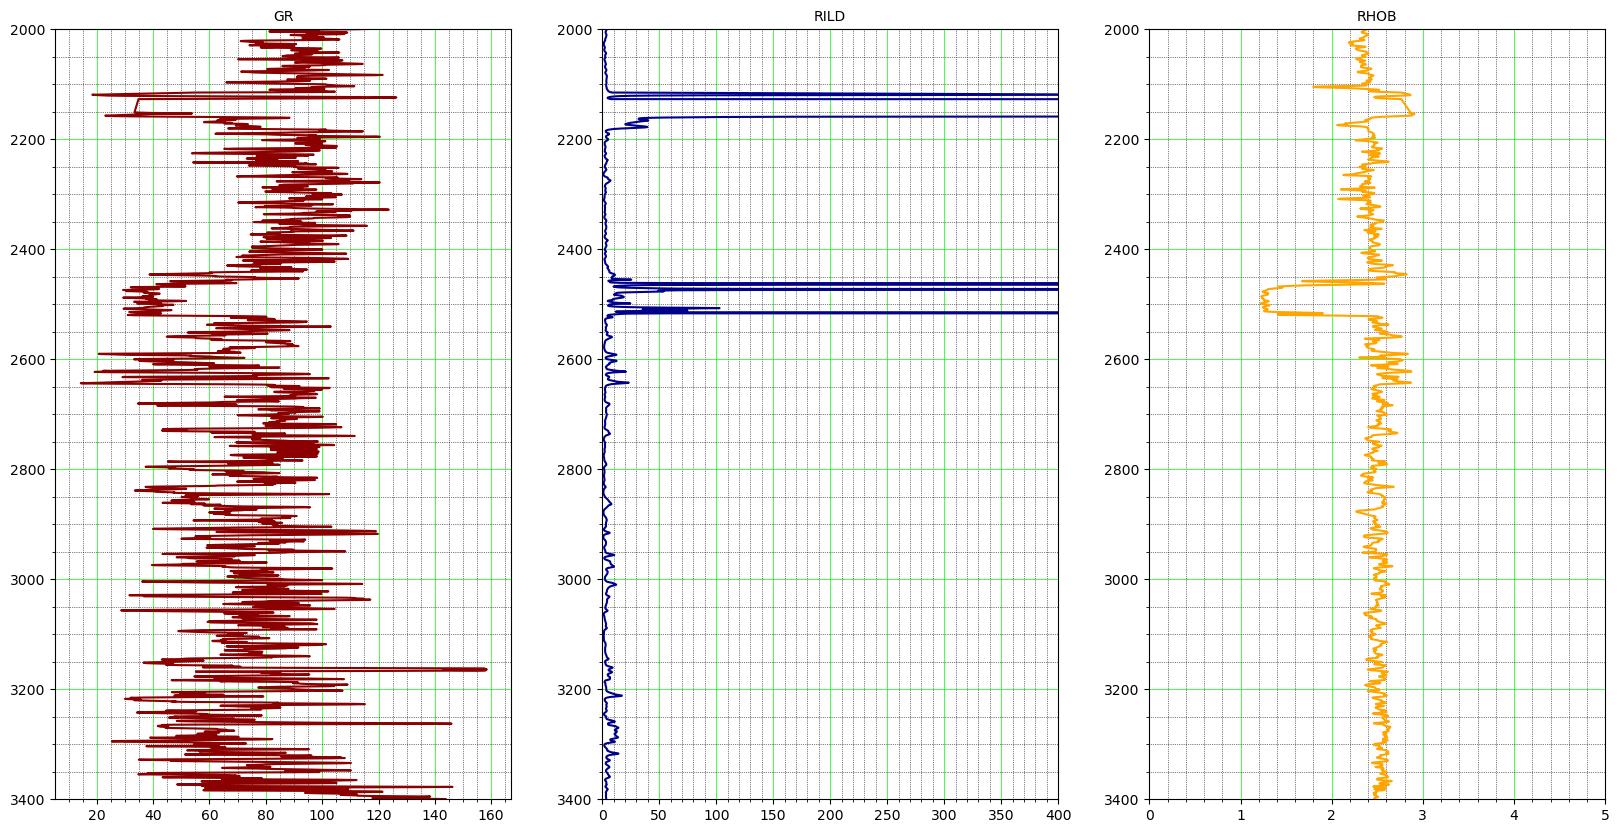

In [40]:
import missingno as msn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

def well_log_display(df, col_depth, col_list, col_semilog=None, min_depth=None, max_depth=None,
                     col_min=None, col_max=None, colors=None, fm_tops=None, fm_depths=None,
                     tight_layout=1, title_size=10):
    logs = col_list
    fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20, 10))

    for i in range(len(logs)):
        plot_func = ax[i].semilogx if (col_semilog is not None and i == col_semilog) else ax[i].plot

        if colors is not None:
            plot_func(df[logs[i]], df[col_depth], color=colors[i])
        else:
            plot_func(df[logs[i]], df[col_depth])

        ax[i].set_title(logs[i], size=title_size)
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')

        if col_min is not None and col_max is not None:
            ax[i].set_xlim(col_min[i], col_max[i])

        if min_depth is not None and max_depth is not None:
            ax[i].set_ylim(min_depth, max_depth)

        ax[i].invert_yaxis()

        # Adjust x-axis range for 'RILD' and 'RHOB'
        if logs[i] == 'RILD':
            ax[i].set_xlim(0, 400)
        elif logs[i] == 'RHOB':
            ax[i].set_xlim(0, 5)

    if fm_tops is not None and fm_depths is not None:
        rgb = [(random.random(), random.random(), random.random()) for _ in range(len(fm_tops))]
        for i in range(len(logs)):
            for j in range(len(fm_tops)):
                ax[i].axhline(y=fm_depths[j], linestyle=":", c=rgb[j], label=fm_tops[j])

    plt.show()

# Example usage:
column_depth = 'DEPT'
column_list = ['GR', 'RILD', 'RHOB']  # 6 logs
column_semilog = 6
column_min = None
column_max = None
min_depth = 2000
max_depth = 3400
colors = ["darkred", "darkblue", "orange"]
well_log_display(DF, column_depth, column_list, column_semilog, min_depth, max_depth, column_min, column_max, colors)



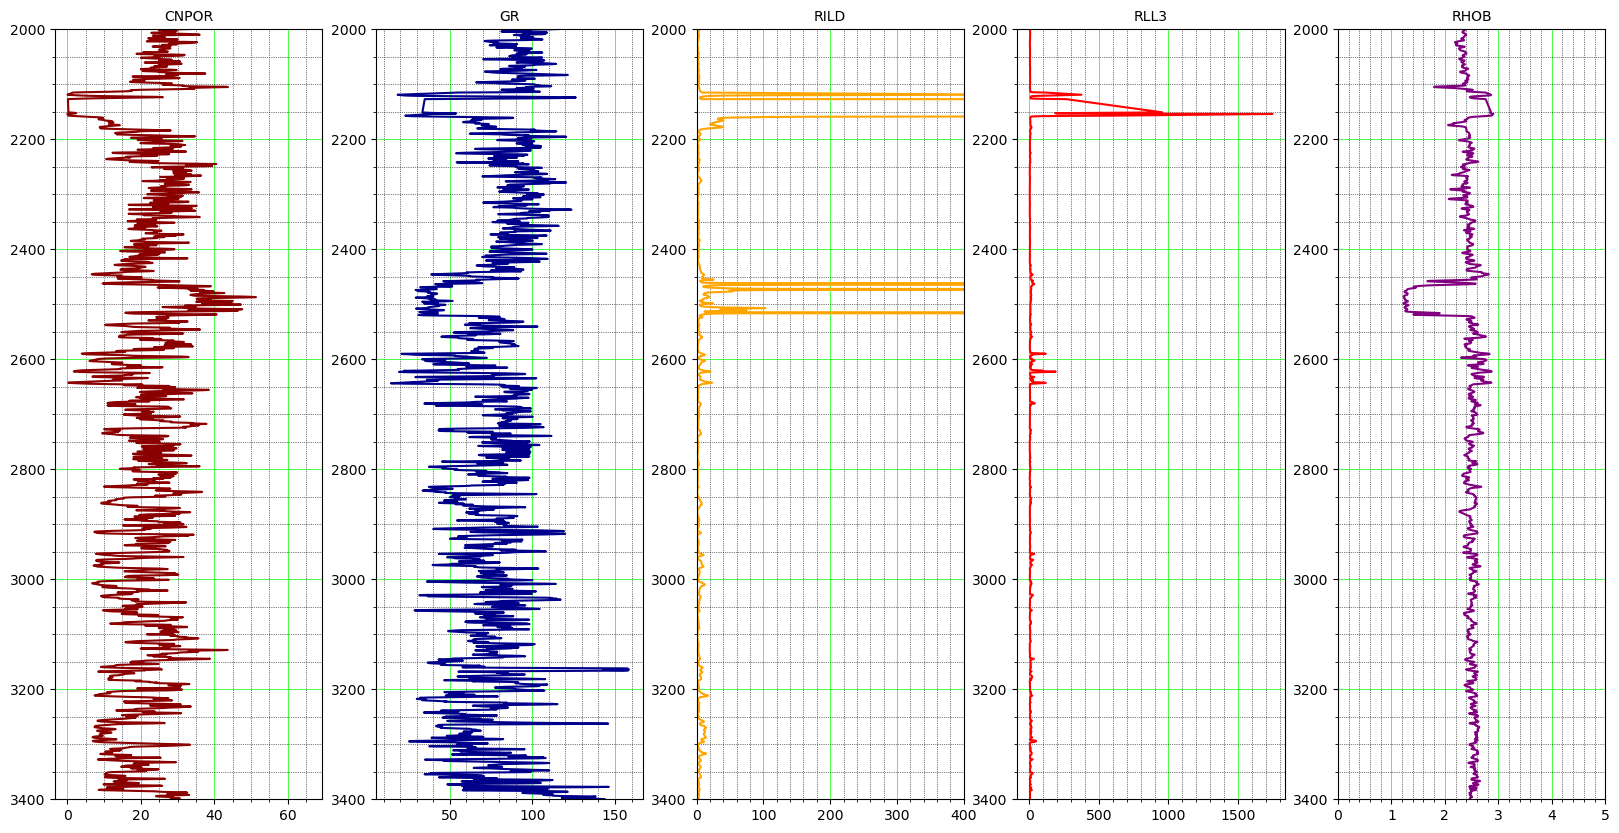

In [41]:
column_depth = 'DEPT'
column_list = ['CNPOR','GR','RILD','RLL3','RHOB'] ##6logs   -Drilling fluid effect on RILD AND RIL3 
column_semilog = 6
column_min=None
column_max=None
min_depth= 2000
max_depth= 3400
colors=["darkred","darkblue", "orange", "red","purple"]
well_log_display(DF, column_depth, column_list, column_semilog, min_depth, max_depth, column_min, column_max, colors)



In [42]:
import matplotlib.pyplot as plt
import numpy as np

def triple_combo(df, col_depth, col_GR, col_resistivity, col_NPHI, col_RHOB,
                 min_depth, max_depth, min_GR=0, max_GR=150, sand_GR_line=60,
                 min_resistivity=0.01, max_resistivity=3000,
                 color_GR='black', color_resistivity='green',
                 color_RHOB='red', color_NPHI='blue',
                 figsize=(6, 10), tight_layout=1,
                 title_size=15, title_height=1.05):
    fig, ax = plt.subplots(1, 3, figsize=(8, 10))
    fig.suptitle('Triple Combo Log', size=title_size, y=title_height)

    for axis in ax:
        axis.minorticks_on()
        axis.grid(which='major', linestyle='-', linewidth='0.5', color='lime')
        axis.grid(which='minor', linestyle=':', linewidth='1', color='black')

    ax[0].get_xaxis().set_visible(False)
    ax[0].invert_yaxis()

    gr = ax[0].twiny()
    gr.set_xlim(min_GR, max_GR)
    gr.set_xlabel('GR', color=color_GR)
    gr.set_ylim(max_depth, min_depth)
    gr.spines['top'].set_position(('outward', 10))
    gr.tick_params(axis='x', colors=color_GR)
    gr.plot(df[col_GR], df[col_depth], color=color_GR)

    gr.minorticks_on()
    gr.xaxis.grid(which='major', linestyle='-', linewidth='0.5', color='lime')
    gr.xaxis.grid(which='minor', linestyle=':', linewidth='1', color='black')

    gr.fill_betweenx(df[col_depth], sand_GR_line, df[col_GR], where=(sand_GR_line >= df[col_GR]),
                     color='gold', linewidth=0)
    gr.fill_betweenx(df[col_depth], sand_GR_line, df[col_GR], where=(sand_GR_line < df[col_GR]),
                     color='lime', linewidth=0)

    ax[1].get_xaxis().set_visible(False)
    ax[1].invert_yaxis()

    res = ax[1].twiny()
    res.set_xlim(min_resistivity, max_resistivity)
    res.set_xlabel('Resistivity', color=color_resistivity)
    res.set_ylim(max_depth, min_depth)
    res.spines['top'].set_position(('outward', 10))
    res.tick_params(axis='x', colors=color_resistivity)
    res.semilogx(df[col_resistivity], df[col_depth], color=color_resistivity)

    res.minorticks_on()
    res.xaxis.grid(which='major', linestyle='-', linewidth='0.5', color='lime')
    res.xaxis.grid(which='minor', linestyle=':', linewidth='1', color='black')

    ax[2].get_xaxis().set_visible(False)
    ax[2].invert_yaxis()

    nphi = ax[2].twiny()
    nphi.set_xlim(40,-20)
    nphi.invert_xaxis()
    nphi.set_xlabel('NPHI', color='blue')
    nphi.set_ylim(max_depth, min_depth)
    nphi.spines['top'].set_position(('outward', 10))
    nphi.tick_params(axis='x', colors='blue')
    nphi.plot(df[col_NPHI], df[col_depth], color=color_NPHI)

    nphi.minorticks_on()
    nphi.xaxis.grid(which='major', linestyle='-', linewidth='0.5', color='lime')
    nphi.xaxis.grid(which='minor', linestyle=':', linewidth='1', color='black')

    rhob = ax[2].twiny()
    rhob.set_xlim(1, 3)
    rhob.set_xlabel('RHOB', color='red')
    rhob.set_ylim(max_depth, min_depth)
    rhob.spines['top'].set_position(('outward', 50))
    rhob.tick_params(axis='x', colors='red')
    rhob.plot(df[col_RHOB], df[col_depth], color=color_RHOB)

    x2p, _ = (rhob.transData + nphi.transData.inverted()).transform(np.c_[df[col_RHOB], df[col_depth]]).T
    nphi.autoscale(False)
    nphi.fill_betweenx(df[col_depth], df[col_NPHI], x2p, color="orange", alpha=0.4, where=(x2p > df[col_NPHI]))
    nphi.fill_betweenx(df[col_depth], df[col_NPHI], x2p, color="blue", alpha=0.4, where=(x2p < df[col_NPHI]))

    res.minorticks_on()
    res.grid(which='major', linestyle='-', linewidth='0.5', color='lime')
    res.grid(which='minor', linestyle=':', linewidth='1', color='black')

    plt.show()



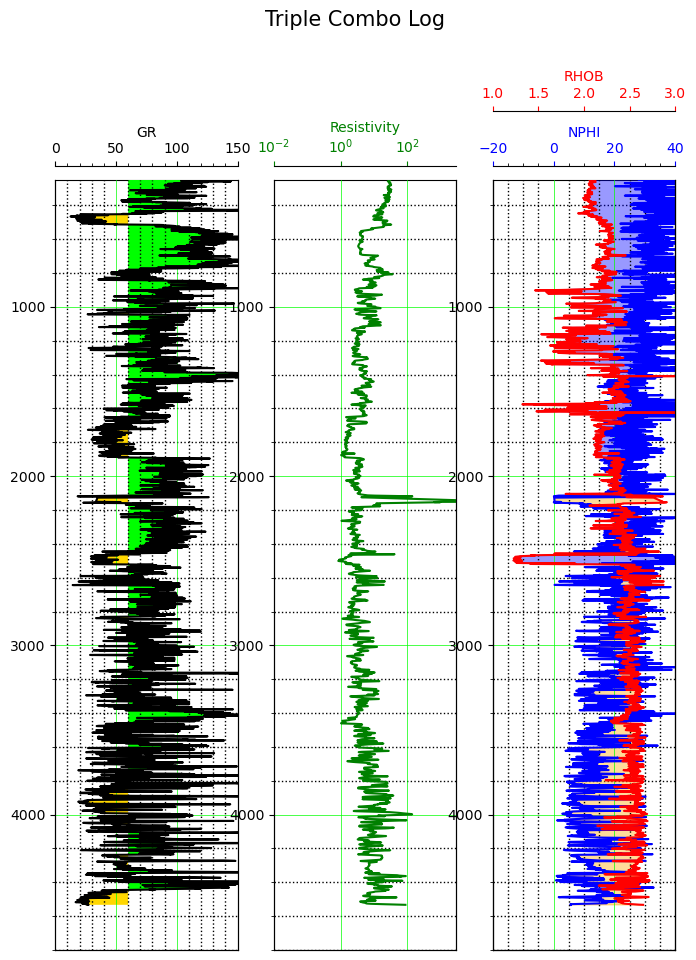

In [43]:
column_depth = 'DEPT'
column_GR = 'GR'
column_resistivity = 'RILM'
column_CNPOR = 'CNPOR'
column_RHOB  = 'RHOB'
min_depth= 250
max_depth= 4800
triple_combo(DF, column_depth, column_GR, column_resistivity, column_CNPOR, column_RHOB, min_depth, max_depth)


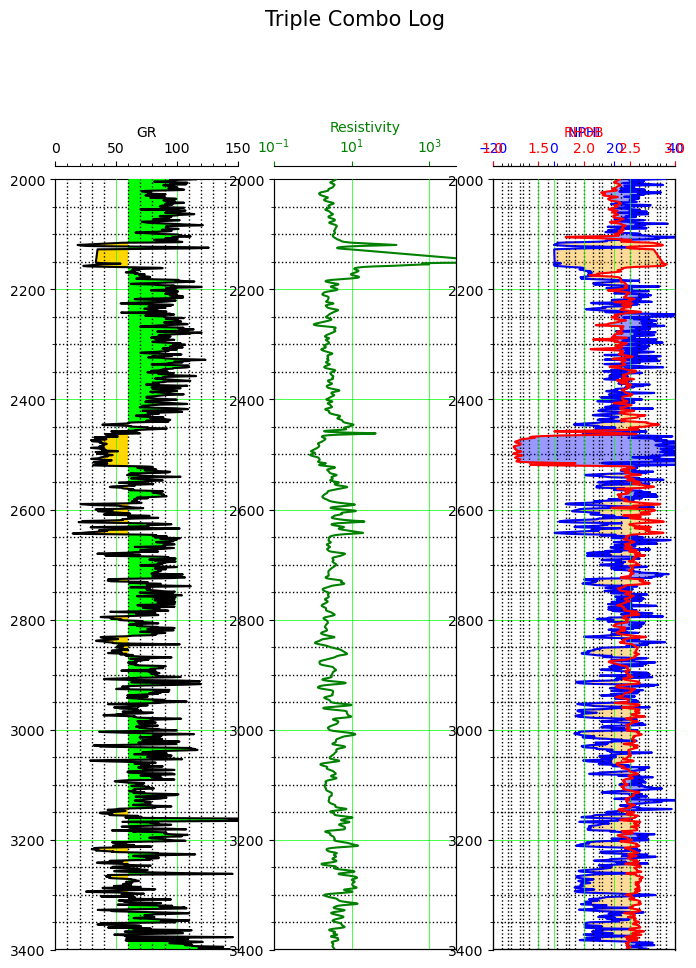

In [44]:
import matplotlib.pyplot as plt
import numpy as np

def triple_combo(df, col_depth, col_GR, col_resistivity, 
                 col_NPHI, col_RHOB, min_depth, max_depth, 
                 min_GR=0, max_GR=150, sand_GR_line=60,
                 min_res=0.1, max_res=5000, 
                 color_GR='black', color_res='green', 
                 color_RHOB='red', color_NPHI='blue',
                 figsize=(6,10), tight_layout=1, 
                 title_size=15, title_height=1.05):

    fig, ax = plt.subplots(1, 3, figsize=(8,10))
    fig.suptitle('Triple Combo Log', size=title_size, y=title_height)

    for a in ax:
        a.minorticks_on()
        a.grid(which='major', linestyle='-', linewidth='0.5', color='lime')
        a.grid(which='minor', linestyle=':', linewidth='1', color='black')
        a.get_xaxis().set_visible(False)
        a.invert_yaxis()  

    def plot_track(ax, col_data, col_depth, col_param, col_color, min_val, max_val, log=False):
        track = ax.twiny()
        track.set_xlim(min_val, max_val)
        track.set_xlabel(col_param, color=col_color)
        track.set_ylim(max_depth, min_depth)
        track.spines['top'].set_position(('outward', 10))
        track.tick_params(axis='x', colors=col_color)
        
        if log:
            track.semilogx(df[col_data], df[col_depth], color=col_color)
        else:
            track.plot(df[col_data], df[col_depth], color=col_color)

        track.minorticks_on()
        track.xaxis.grid(which='major', linestyle='-', linewidth='0.5', color='lime')
        track.xaxis.grid(which='minor', linestyle=':', linewidth='1', color='black')  

        return track

    # First track: GR
    gr = plot_track(ax[0], col_GR, col_depth, 'GR', color_GR, min_GR, max_GR)

    gr.fill_betweenx(df[col_depth], sand_GR_line, df[col_GR], where=(sand_GR_line >= df[col_GR]), color='gold', linewidth=0)
    gr.fill_betweenx(df[col_depth], sand_GR_line, df[col_GR], where=(sand_GR_line < df[col_GR]), color='lime', linewidth=0)

    # Second track: Resistivity
    res = plot_track(ax[1], col_resistivity, col_depth, 'Resistivity', color_res, min_res, max_res, log=True)

    # Third track: NPHI and RHOB
    nphi = plot_track(ax[2], col_NPHI, col_depth, 'NPHI', 'blue', -20,40)
    rhob = plot_track(ax[2], col_RHOB, col_depth, 'RHOB', 'red', 1, 3)

    x2p, _ = (rhob.transData + nphi.transData.inverted()).transform(np.c_[df[col_RHOB], df[col_depth]]).T
    nphi.autoscale(False)
    nphi.fill_betweenx(df[col_depth], df[col_NPHI], x2p, color="orange", alpha=0.4, where=(x2p > df[col_NPHI])) # hydrocarbon
    nphi.fill_betweenx(df[col_depth], df[col_NPHI], x2p, color="blue", alpha=0.4, where=(x2p < df[col_NPHI])) # water

    plt.show()

# Example usage
column_depth = 'DEPT'
column_GR = 'GR'
column_resistivity = 'RILM'
column_CNPOR = 'CNPOR'
column_RHOB = 'RHOB'
min_depth = 2000
max_depth = 3400
triple_combo(DF, column_depth, column_GR, column_resistivity, column_CNPOR, column_RHOB, min_depth, max_depth)



## 1. RILD and RLL3
## 2. RILM and RLL3
## 3. RILD and RILM
## 4. CNPOR and GR

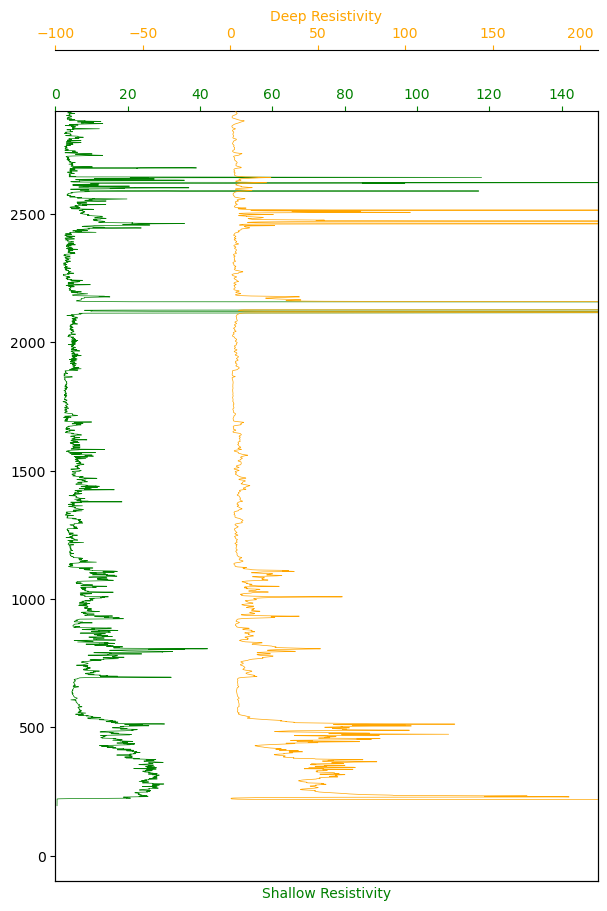

In [55]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(7, 10))
ax2 = ax1.twiny()

ax1.plot('RLL3', 'DEPT', data=DF, color='green', lw=0.5)  # Change color to green
ax1.set_xlim(0, 150)
ax1.set_xlabel('Shallow Resistivity')
ax1.xaxis.label.set_color("green")
ax1.tick_params(axis='x', colors="green")

ax2.plot('RILD', 'DEPT', data=DF, color='orange', lw=0.5)  # Change color to orange
ax2.set_xlim(-100, 210)
ax2.set_xlabel('Deep Resistivity')
ax2.xaxis.label.set_color("orange")
ax2.spines["top"].set_position(("axes", 1.08))
ax2.tick_params(axis='x', colors="orange")

for ax in [ax1, ax2]:
    ax.set_ylim(-100, 2900)
    ax.xaxis.set_ticks_position("top")

plt.show()


/var/folders/r9/w38fqhpd71z2jz7byr5wm5br0000gn/T/ipykernel_1421/1785239793.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
/var/folders/r9/w38fqhpd71z2jz7byr5wm5br0000gn/T/ipykernel_1421/1785239793.py:27: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)


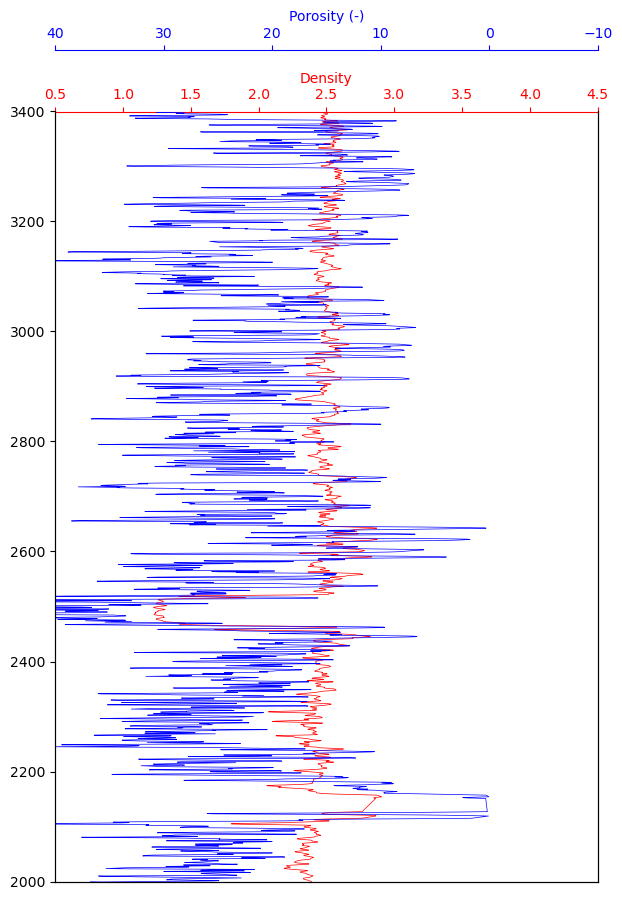

In [61]:
fig = plt.subplots(figsize=(7,10))

ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
ax2 = ax1.twiny()

ax1.plot('RHOB', 'DEPT', data=DF, color='red', lw=0.5)
ax1.set_xlim(0, 4)
ax1.set_xlabel('Density')
ax1.xaxis.label.set_color("red")
ax1.tick_params(axis='x', colors="red")


ax2.plot('CNPOR', 'DEPT', data=DF, color='blue', lw=0.5)
ax2.set_xlim(0.5,4.5)
ax2.set_xlabel('Porosity')
ax2.xaxis.label.set_color("blue")
ax2.spines["top"].set_position(("axes", 1.08))
ax2.tick_params(axis='x', colors="blue")



for ax in [ax1, ax2]:
    ax.set_ylim(-100, 2900)
    ax.xaxis.set_ticks_position("top")


ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
ax2 = ax1.twiny()

ax1.plot('RHOB', 'DEPT', data=DF, color='red', lw=0.5)
ax1.set_xlim(0.5,4.5)
ax1.set_xlabel('Density')
ax1.xaxis.label.set_color("red")
ax1.tick_params(axis='x', colors="red")
ax1.spines["top"].set_edgecolor("red")

ax2.plot('CNPOR', 'DEPT', data=DF, color='blue', lw=0.5)
ax2.set_xlim(40,-10)
ax2.set_xlabel('Porosity (-)')
ax2.xaxis.label.set_color("blue")
ax2.spines["top"].set_position(("axes", 1.08))
ax2.tick_params(axis='x', colors="blue")
ax2.spines["top"].set_edgecolor("blue")


for ax in [ax1, ax2]:
    ax.set_ylim(2000,3400)
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

/var/folders/r9/w38fqhpd71z2jz7byr5wm5br0000gn/T/ipykernel_1421/3812891996.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
/var/folders/r9/w38fqhpd71z2jz7byr5wm5br0000gn/T/ipykernel_1421/3812891996.py:29: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)


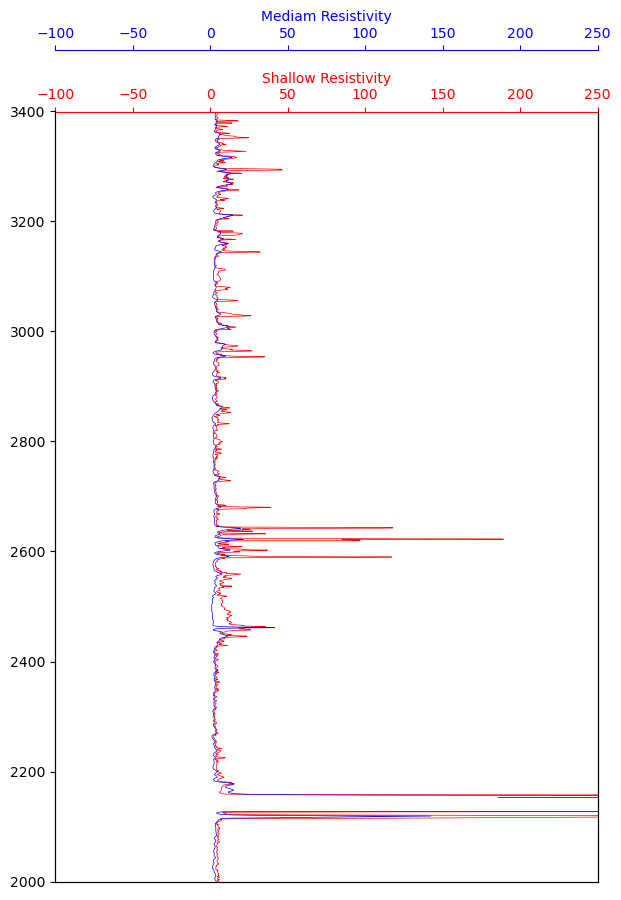

In [62]:
fig = plt.subplots(figsize=(7,10))

ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
ax2 = ax1.twiny()


ax1.plot('RLL3', 'DEPT', data=DF, color='red', lw=0.5)
ax1.set_xlim(0, 250)
ax1.set_xlabel('Shallow Resistivity')
ax1.xaxis.label.set_color("red")
ax1.tick_params(axis='x', colors="red")

ax2.plot('RILM', 'DEPT', data=DF, color='blue', lw=0.5)
ax2.set_xlim(-100, 250)
ax2.set_xlabel('Mediam Resistivity')
ax2.xaxis.label.set_color("blue")
ax2.spines["top"].set_position(("axes", 1.08))
ax2.tick_params(axis='x', colors="blue")





for ax in [ax1, ax2]:
    ax.set_ylim(-100, 2900)
    ax.xaxis.set_ticks_position("top")


ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
ax2 = ax1.twiny()

ax1.plot('RLL3', 'DEPT', data=DF, color='red', lw=0.5)
ax1.set_xlim(-100, 250)
ax1.set_xlabel('Shallow Resistivity')
ax1.xaxis.label.set_color("red")
ax1.tick_params(axis='x', colors="red")
ax1.spines["top"].set_edgecolor("red")

ax2.plot('RILM', 'DEPT', data=DF, color='blue', lw=0.5)
ax2.set_xlim(-100, 250)
ax2.set_xlabel('Mediam Resistivity')
ax2.xaxis.label.set_color("blue")
ax2.spines["top"].set_position(("axes", 1.08))
ax2.tick_params(axis='x', colors="blue")
ax2.spines["top"].set_edgecolor("blue")




for ax in [ax1, ax2]:
    ax.set_ylim(2000, 3400)
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")